## Principal Component Analysis

In [1]:
%run load_data.py

In [2]:
pca_box_cox = PCA()
pca_box_cox.fit(Z_bc_rmo)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

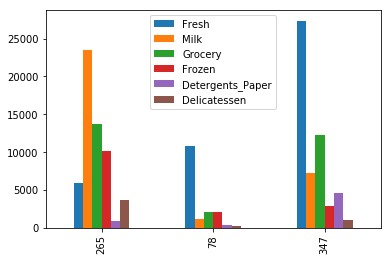

In [4]:
np.random.seed(42)
sample = X.sample(3)
sample.plot(kind='bar')

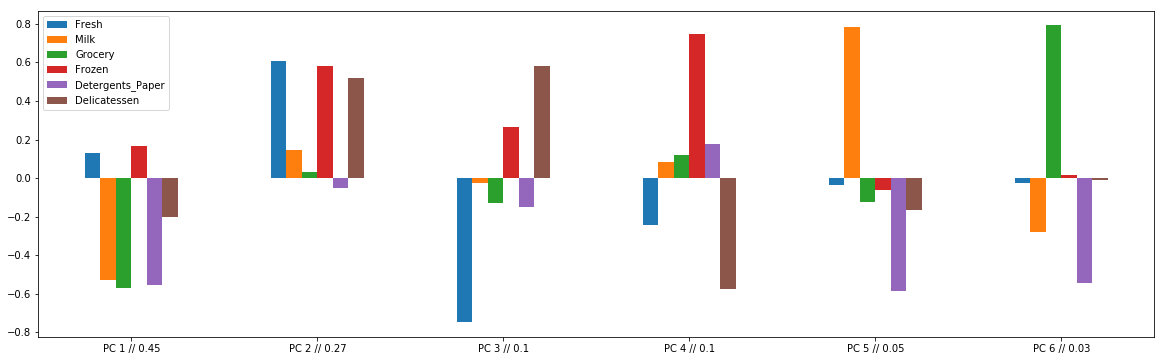

In [9]:
principal_component_loadings_box_cox = \
 pd.DataFrame(pca_box_cox.components_, 
 columns=Z_bc_rmo.columns)

explained_variance_ratio_box_cox = pca_box_cox.explained_variance_ratio_
pca_labels_box_cox = ['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(explained_variance_ratio_box_cox)]

ax = principal_component_loadings_box_cox.plot(kind='bar', figsize=(20,6), rot=0)
ax.set_xticklabels(pca_labels_box_cox);

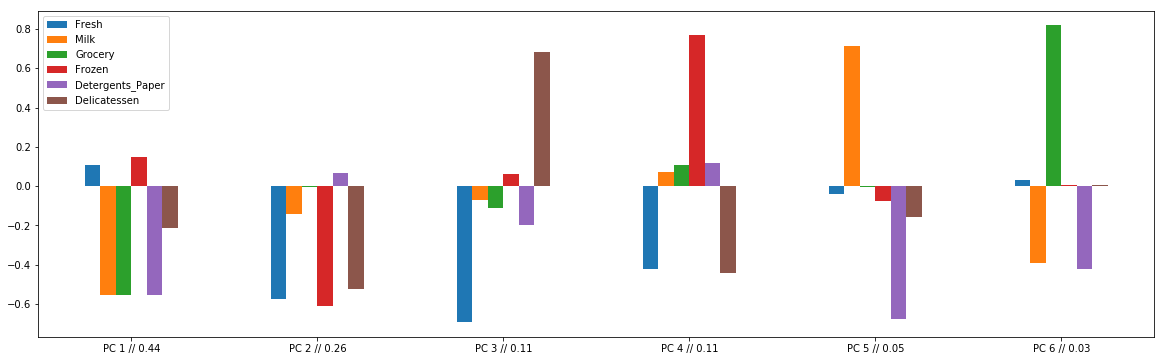

In [16]:
pca_log = PCA()
pca_log.fit(Z_log_rmo)

principal_component_loadings_log = pd.DataFrame(pca_log.components_, 
                                                columns=Z_log_rmo.columns)

explained_variance_ratio_log = pca_log.explained_variance_ratio_
pca_labels_log = ['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(explained_variance_ratio_log)]

ax = principal_component_loadings_log.plot(kind='bar', figsize=(20,6), rot=0)
ax.set_xticklabels(pca_labels_log);

In [15]:
pca_orig = PCA()
pca_orig.fit(X)
pca_scaled = PCA()
pca_scaled.fit(Z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
principal_component_loadings_orig = pd.DataFrame(pca_orig.components_, 
                                                 columns=X.columns)
principal_component_loadings_scaled = pd.DataFrame(pca_scaled.components_, 
                                                   columns=Z.columns)

In [18]:
explained_variance_ratio_orig = pca_orig.explained_variance_ratio_
explained_variance_ratio_scaled = pca_scaled.explained_variance_ratio_
pca_labels_orig = ['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(explained_variance_ratio_orig)]
pca_labels_scaled = ['PC ' + str(i+1) +' // ' + str(round(ratio,2)) for i, ratio in enumerate(explained_variance_ratio_scaled)]

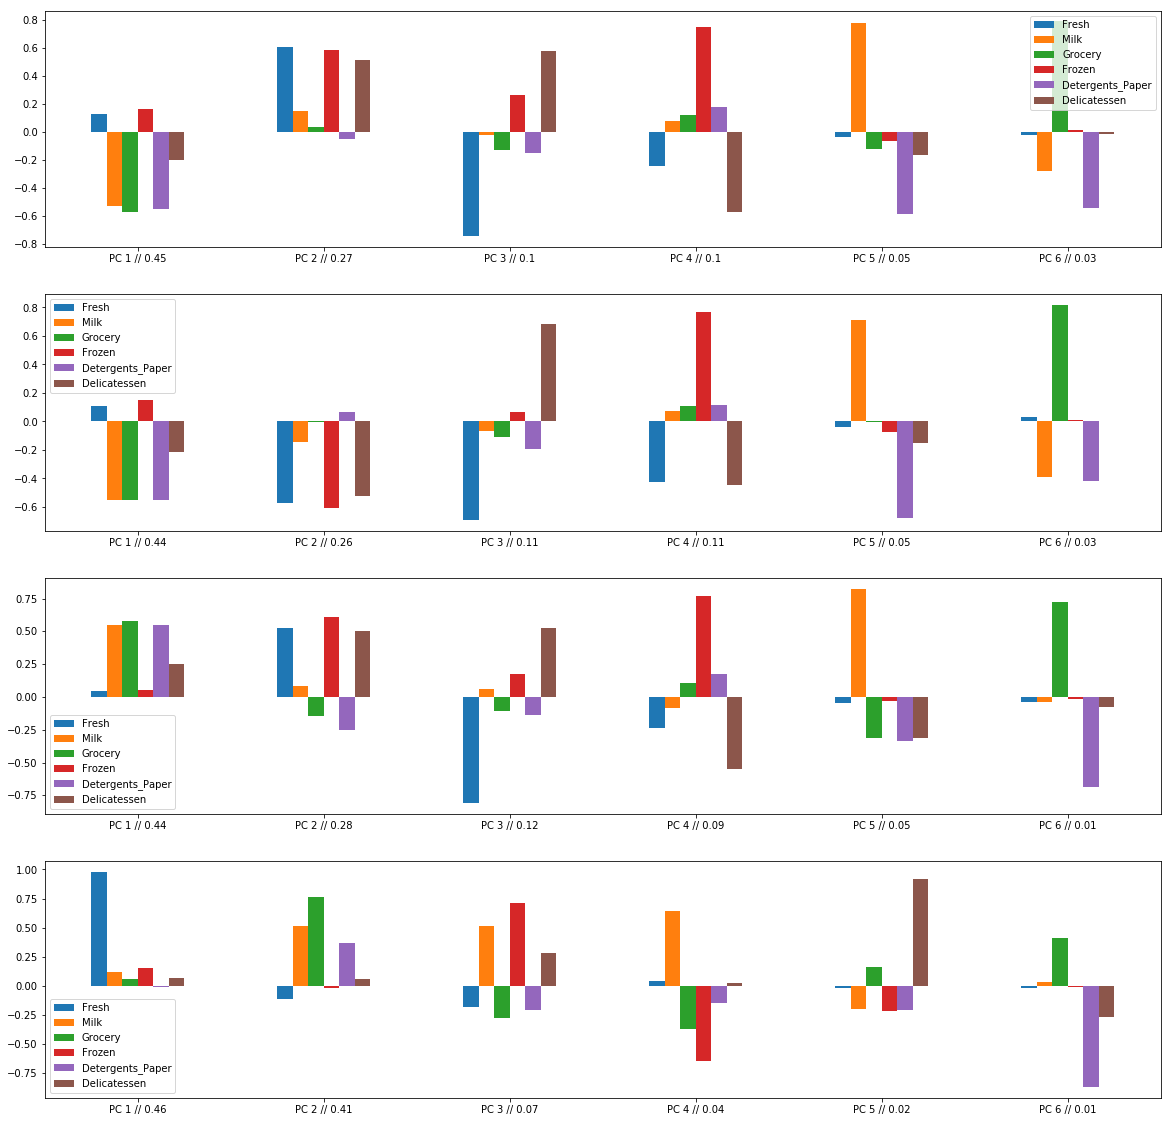

In [19]:
_, ax = plt.subplots(4,1,figsize=(20,20))
principal_component_loadings_box_cox.plot(kind='bar', rot=0, ax=ax[0])
ax[0].set_xticklabels(pca_labels_box_cox)
principal_component_loadings_log.plot(kind='bar', rot=0, ax=ax[1])
ax[1].set_xticklabels(pca_labels_log)
principal_component_loadings_scaled.plot(kind='bar', rot=0, ax=ax[2])
ax[2].set_xticklabels(pca_labels_scaled)
principal_component_loadings_orig.plot(kind='bar', rot=0, ax=ax[3])
ax[3].set_xticklabels(pca_labels_orig);

#### Scree Plot

Look for "the bend". This will tell you how many components to keep.

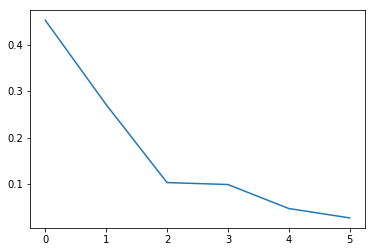

In [20]:
plt.plot(pca_box_cox.explained_variance_ratio_)

In [22]:
pca = PCA(2)
pca.fit(Z_bc_rmo)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
np.random.seed(42)
sample = Z_bc_rmo.sample(3)

In [25]:
customer_pca_df = pd.DataFrame(pca.transform(Z_bc_rmo), 
                               columns=['Dim 1', 'Dim 2'],
                               index=Z_bc_rmo.index)
sample_pca_df = pd.DataFrame(pca.transform(sample), 
                             columns=['Dim 1', 'Dim 2'],
                             index=sample.index)

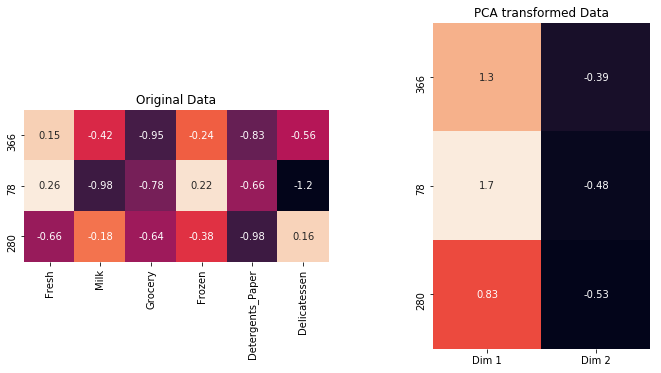

In [26]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.title("Original Data")
sns.heatmap(sample, annot=True, cbar=False, square=True)
fig.add_subplot(122)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_df, annot=True, cbar=False, square=True)

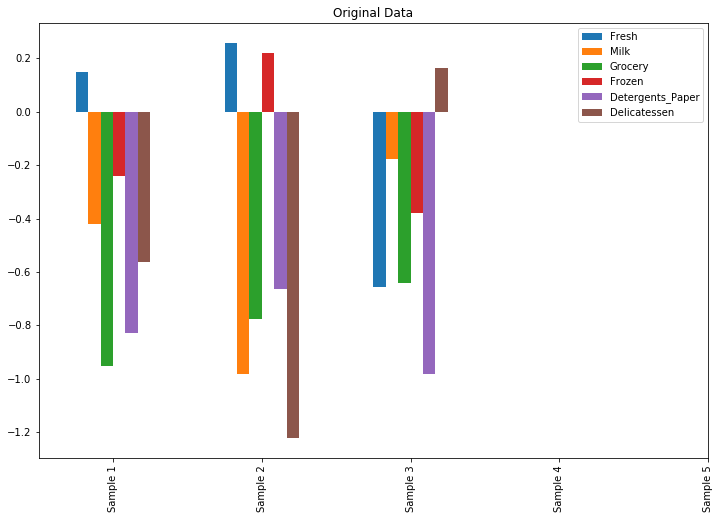

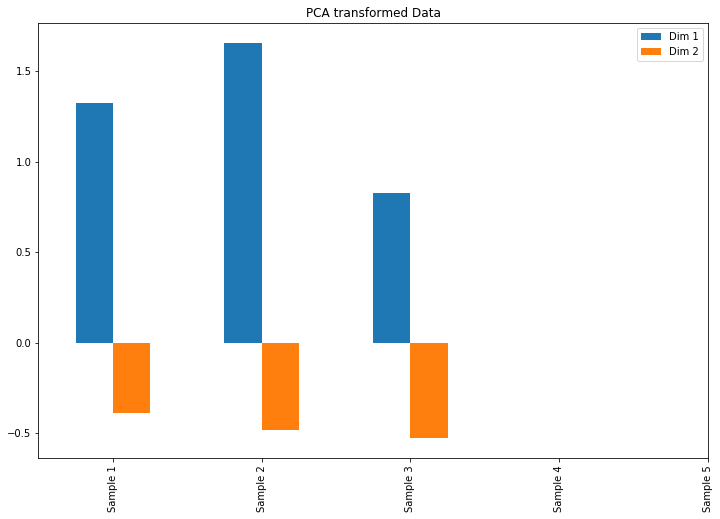

In [27]:
sample.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

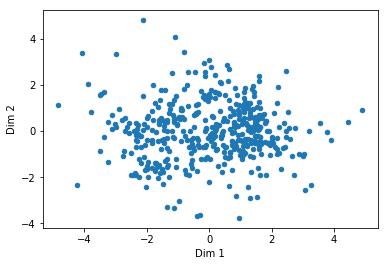

In [32]:
customer_pca_df.plot(x='Dim 1', y='Dim 2', kind='scatter')